**Общая информация**

**Срок сдачи:** 21 октября 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import  fetch_20newsgroups
'''fetch_mldata'''
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import scipy.spatial.distance as dist
from sklearn.neighbors import KDTree
import random
import scipy

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [3]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        pass
    
    def fit(self, X, y):
        if self.algorithm == 'brute':
            self.x_train = X
            self.y_train = y
            self.max_class = y.max() + 1
            return
        if self.algorithm == 'kd_tree':
            self.x_train = X
            self.y_train = y
            self.max_class = y.max() + 1
            self.tree = KDTree(X)
            
    def predict(self, X):
        if self.algorithm == 'brute':
            dist_mas = dist.cdist(X, self.x_train, 'euclidean')
            mas = dist_mas.argpartition(self.n_neighbors, axis=1)[:, :self.n_neighbors]
            mas = y_train[mas]
            res = np.empty([self.max_class, X.shape[0]])#(mas == 0).sum(axis=1)[np.newaxis, :]
            for unique_class in np.arange(self.max_class):
                res[unique_class, :] = (mas == unique_class).sum(axis = 1)[np.newaxis, :]
            return res.argmax(axis = 0)
        if self.algorithm == 'kd_tree':
            mas = self.tree.query(X, k=self.n_neighbors, return_distance=False)
            mas = y_train[mas]
            res = np.empty([self.max_class, X.shape[0]])#(mas == 0).sum(axis=1)[np.newaxis, :]
            for unique_class in np.arange(self.max_class):
                res[unique_class, :] = (mas == unique_class).sum(axis = 1)[np.newaxis, :]
            return res.argmax(axis = 0)

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [4]:
iris = datasets.load_iris()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [6]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [7]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [8]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [9]:
%time clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 613 µs


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [10]:
%time my_clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 58.2 µs


In [11]:
%time clf.predict(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.53 ms


array([2, 1, 0, 0, 0, 1, 2, 1, 1, 0, 1, 0, 1, 2, 2])

In [12]:
%time my_clf.predict(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 338 µs


array([2, 1, 0, 0, 0, 1, 2, 1, 1, 0, 1, 0, 1, 2, 2])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [13]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [15]:
%time clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.74 ms


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [16]:
%time my_clf.fit(X_train, y_train)

CPU times: user 15.6 ms, sys: 0 ns, total: 15.6 ms
Wall time: 190 µs


In [17]:
%time clf.predict(X_test)

CPU times: user 15.6 ms, sys: 0 ns, total: 15.6 ms
Wall time: 3.85 ms


array([0, 0, 2, 1, 2, 0, 2, 2, 0, 2, 1, 1, 1, 1, 0])

In [18]:
%time my_clf.predict(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 582 µs


array([0, 0, 2, 1, 2, 0, 2, 2, 0, 2, 1, 1, 1, 1, 0])

In [19]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [20]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [21]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [23]:
from sklearn.model_selection import cross_val_score
folds = 3
clf = KNeighborsClassifier(n_neighbors = 1, algorithm = 'brute')
pred = cross_val_score(clf, X, target, cv=folds)


Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [24]:
y_pred = []
k = np.arange(1, 11)
for i in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors = i, algorithm = 'brute')
    pred = cross_val_score(clf, X, target, cv=folds)
    y_pred.append(pred.mean())

In [25]:
np.argmax(np.array(y_pred).mean(axis = 0)) + 1

1

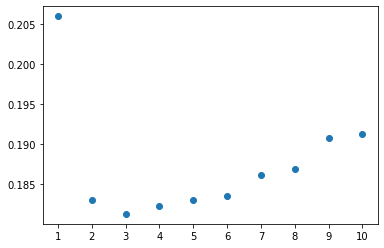

In [27]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, xticks = range(11))
ax.scatter(np.arange(10) + 1, y_pred)

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

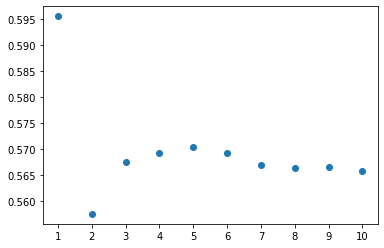

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data)

y_pred = []
k = np.arange(1, 11)
for i in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors = i, algorithm = 'brute', metric='cosine')
    pred = cross_val_score(clf, X, target, cv=folds)
    y_pred.append(pred.mean())

    %matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, xticks = range(11))
ax.scatter(np.arange(10) + 1, y_pred)

In [ ]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [32]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])
data = newsgroups['data']
target = newsgroups['target']
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data)
clf.fit(X, target)

newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])
data = newsgroups['data']
target = newsgroups['target']
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data)
accuracy_score(target, clf.predict(X))

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 71018 while Y.shape[1] == 101631